In [21]:
%matplotlib inline
import numpy as np 
import aplpy as ap 
import matplotlib as mpl 
from astropy import units as u
from astropy.io import fits
from matplotlib import pyplot as plt
from spectral_cube import SpectralCube as sc
import matplotlib.patheffects as path_effects
from astropy.wcs import WCS
from astropy import wcs
mpl.rc("font", family="sans-serif", size=11)
mpl.rc("axes", linewidth = 1)
mpl.rc("lines", linewidth = 1)
mpl.rc("xtick.major", pad = 5, width = 1)
mpl.rc("ytick.major", pad = 5, width = 1)
mpl.rc("xtick.minor", width = 1)
mpl.rc("ytick.minor", width = 1)
import pyregion
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# from specutils.spectra import Spectrum1D

In [2]:
# /home/max/Data/G206.93-16.61E2/Data/G206E2_G205M2_combined/G206.93-16.61E2_COc.fits

In [3]:
hi_data = fits.open('G206.93-16.61E2_COc.fits') [0] # Open the FITS file for reading
cube = sc.read(hi_data,hdu=0)

In [4]:
cube.shape

(220, 1200, 1200)

In [5]:
cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')

In [6]:
cube_slab = cube.spectral_slab(-30 *u.km / u.s, 30 *u.km / u.s)
print(cube_slab)

SpectralCube with shape=(44, 1200, 1200) and unit=Jy / beam:
 n_x:   1200  type_x: RA---SIN  unit_x: deg    range:    85.395467 deg:   85.415466 deg
 n_y:   1200  type_y: DEC--SIN  unit_y: deg    range:    -2.298371 deg:   -2.278387 deg
 n_s:     44  type_s: VRAD      unit_s: km / s  range:      -29.600 km / s:      30.600 km / s


In [7]:
cube = cube_slab[:,370:870,370:870]
cube

SpectralCube with shape=(44, 500, 500) and unit=Jy / beam:
 n_x:    500  type_x: RA---SIN  unit_x: deg    range:    85.400971 deg:   85.409295 deg
 n_y:    500  type_y: DEC--SIN  unit_y: deg    range:    -2.292204 deg:   -2.283887 deg
 n_s:     44  type_s: VRAD      unit_s: km / s  range:      -29.600 km / s:      30.600 km / s

In [8]:
velocity  = np.arange(-29.6,30.6,1.4)
velocity

array([-29.6, -28.2, -26.8, -25.4, -24. , -22.6, -21.2, -19.8, -18.4,
       -17. , -15.6, -14.2, -12.8, -11.4, -10. ,  -8.6,  -7.2,  -5.8,
        -4.4,  -3. ,  -1.6,  -0.2,   1.2,   2.6,   4. ,   5.4,   6.8,
         8.2,   9.6,  11. ,  12.4,  13.8,  15.2,  16.6,  18. ,  19.4,
        20.8,  22.2,  23.6,  25. ,  26.4,  27.8,  29.2,  30.6])

/tmp/ipykernel_7854/3118471374.py:10: UserWarning: The following kwargs were not used by contour: 'smooth'
  plt.contour(b.value,colors='k',alpha=0.5,levels=[1.5,10,20,30,50],smooth=True)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


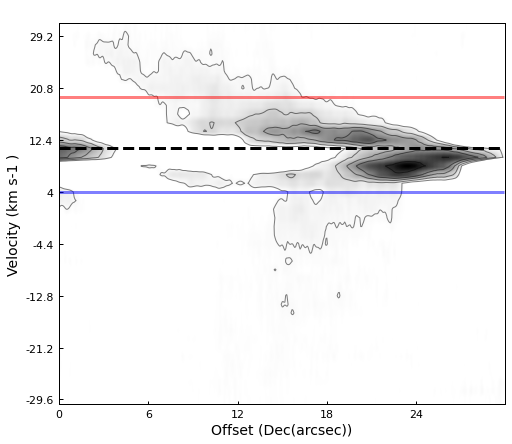

In [9]:
plt.figure(figsize=(8,7))

y = [0,6,12,18,24,30,36,42]
velocity = [-29.6,-21.2,-12.8,-4.4,4,12.4,20.8,29.2]
x = [0,100,200,300,400,500]
pixel = [0,'6''','12''','18''','24''','30''']

b = cube.sum(axis=1)
plt.imshow(b.value,cmap='binary',origin='lower',aspect='auto',vmin=0)
plt.contour(b.value,colors='k',alpha=0.5,levels=[1.5,10,20,30,50],smooth=True)

plt.title(' ') 
plt.xlabel("Offset (Dec(arcsec))",size=14) 
plt.ylabel("Velocity (km s-1 )",size=14) 
plt.yticks(y,velocity)
plt.xticks(x,pixel)
plt.hlines(y=29.1,xmin=0,xmax=498,color='k',linestyles='dashed',linewidths=3)
plt.hlines(y=24,xmin=0,xmax=498,color='blue',linewidths=3,alpha=0.5)
plt.hlines(y=35,xmin=0,xmax=498,color='red',linewidths=3,alpha=0.5)

# plt.xlim(0,449)
plt.savefig('RA.pdf')

-62.828392 38.7949


/tmp/ipykernel_7854/1443872340.py:11: UserWarning: The following kwargs were not used by contour: 'smooth'
  plt.contour(a.value,colors='k',alpha=0.5,levels=[1,10,20,30,50],smooth=True)


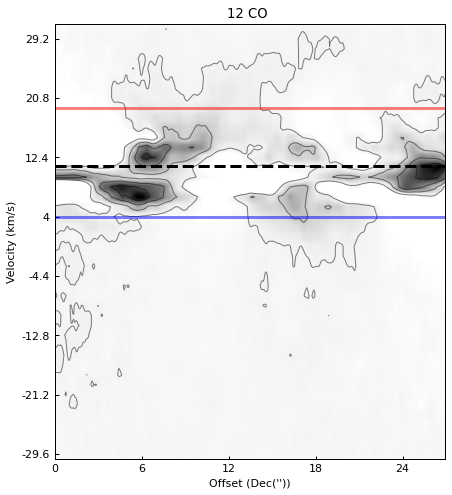

In [10]:
plt.figure(figsize=(7,8))

y = [0,6,12,18,24,30,36,42]
velocity = [-29.6,-21.2,-12.8,-4.4,4,12.4,20.8,29.2]
x = [0,100,200,300,400,500]
pixel = [0,'6''','12''','18''','24''','30''']

a = cube.sum(axis=2)
plt.imshow(a.value,cmap='Greys',origin='lower',aspect='auto',vmin=-3)
rms=4.5e-3
plt.contour(a.value,colors='k',alpha=0.5,levels=[1,10,20,30,50],smooth=True)

plt.title('12 CO ') 
plt.xlabel("Offset (Dec(''))") 
plt.ylabel("Velocity (km/s)") 
plt.yticks(y,velocity)
plt.xticks(x,pixel)

plt.hlines(y=29.1,xmin=0,xmax=498,color='k',linestyles='dashed',linewidths=3)
plt.hlines(y=24,xmin=0,xmax=498,color='blue',linewidths=3,alpha=0.5)
plt.hlines(y=35,xmin=0,xmax=498,color='red',linewidths=3,alpha=0.5)
#plt.savefig('Dec.pdf',dpi=1000)
plt.xlim(0,449)

print(np.min(a.value),np.max(a.value))

(array([[1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([-62.828392 , -52.66606  , -42.503735 , -32.341404 , -22.179075 ,
        -12.0167465,  -1.8544174,   8.307912 ,  18.470242 ,  28.63257  ,
         38.7949   ], dtype=float32),
 <a list of 500 BarContainer objects>)

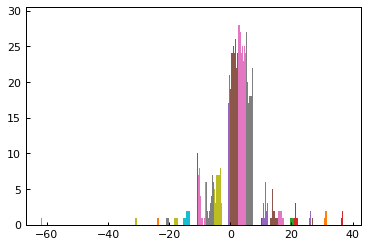

In [25]:
plt.hist(a.value)

/tmp/ipykernel_6351/2811465360.py:17: UserWarning: The following kwargs were not used by contour: 'smooth'
  plt.contour(b.value,colors='k',alpha=0.7,levels=[1,10,20,30,50],smooth=True)
/tmp/ipykernel_6351/2811465360.py:32: UserWarning: The following kwargs were not used by contour: 'smooth'
  plt.contour(a.value,colors='k',alpha=0.7,levels=[1,10,20,30,50],smooth=True)


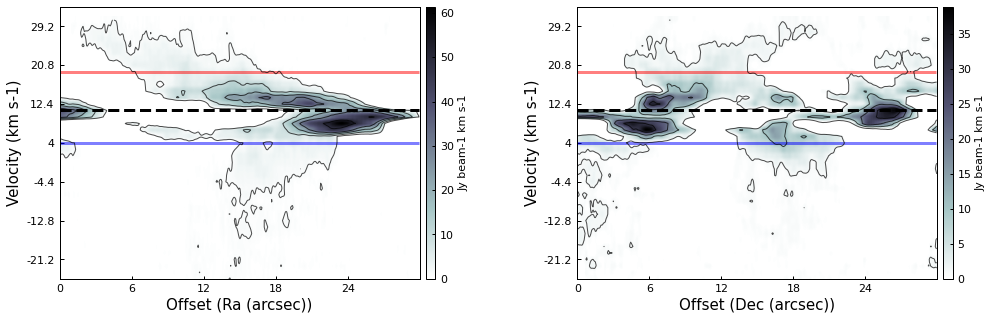

In [31]:
fig = plt.figure(figsize=(17,5))
plt.subplot(121)
ax1 = plt.imshow(b.value,cmap='bone_r',origin='lower',aspect='auto',vmin=0)
rms=5e-3


#plt.title('12 CO ') 
plt.xlabel("Offset (Ra (arcsec))",fontsize = 15) 
plt.ylabel("Velocity (km s-1)",fontsize = 15) 
plt.yticks(y,velocity)
plt.xticks(x,pixel)
# plt.plot(400,26,'ro')

plt.hlines(y=29.1,xmin=0,xmax=498,color='k',linestyles='dashed',linewidths=3)
plt.hlines(y=24,xmin=0,xmax=498,color='blue',linewidths=3,alpha=0.5)
plt.hlines(y=35,xmin=0,xmax=498,color='red',linewidths=3,alpha=0.5)
plt.contour(b.value,colors='k',alpha=0.7,levels=[1,10,20,30,50],smooth=True)
cbar1 = fig.colorbar(ax1,label='Jy beam-1 km s-1',pad=0.015,aspect=30)
plt.ylim(3,45)

plt.subplot(122)
ax2 = plt.imshow(a.value,cmap='bone_r',origin='lower',aspect='auto',vmin=0)
#plt.title('12 CO ') 
plt.xlabel("Offset (Dec (arcsec))",fontsize = 15) 
plt.ylabel("Velocity (km s-1)",fontsize = 15) 
plt.yticks(y,velocity)
plt.xticks(x,pixel)

plt.hlines(y=29.1,xmin=0,xmax=498,color='k',linestyles='dashed',linewidths=3)
plt.hlines(y=24,xmin=0,xmax=498,color='blue',linewidths=3,alpha=0.5)
plt.hlines(y=35,xmin=0,xmax=498,color='red',linewidths=3,alpha=0.5)
plt.contour(a.value,colors='k',alpha=0.7,levels=[1,10,20,30,50],smooth=True)
plt.plot(528/2,9.8+5)

plt.colorbar(ax2,label='Jy beam-1 km s-1',pad=0.015,aspect=30)
plt.ylim(3,45)


plt.savefig('mom_dec.pdf')

In [11]:
hi_data = fits.open('G206.93-16.61E2_COc.fits') [0] # Open the FITS file for reading
cube = sc.read(hi_data,hdu=0)
cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')
hi_data1 = fits.open('G206.93-16.61E2_C180c.fits') [0] # Open the FITS file for reading
cube1 = sc.read(hi_data1,hdu=0)
cube1 = cube1.with_spectral_unit(u.km / u.s, velocity_convention='radio')

In [12]:
cube

SpectralCube with shape=(220, 1200, 1200) and unit=Jy / beam:
 n_x:   1200  type_x: RA---SIN  unit_x: deg    range:    85.395467 deg:   85.415466 deg
 n_y:   1200  type_y: DEC--SIN  unit_y: deg    range:    -2.298371 deg:   -2.278387 deg
 n_s:    220  type_s: VRAD      unit_s: km / s  range:     -150.000 km / s:     156.600 km / s

In [13]:
# a=cube[90:140,615:647,600:630] #COc (613.632)
# a=cube[37:69,522:545,500:525] #531,513
# a=cube[:,501:525,520:542]#531,513
# a=cube[:,500:530,515:545] #531,513
a=cube[90:140,604:634,615:645]
a1=cube1[:,604:634,615:645]


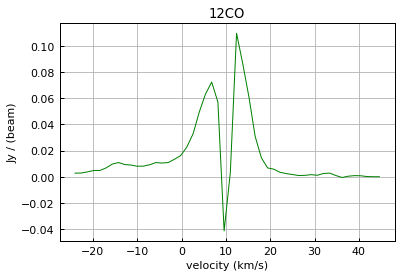

In [14]:
spectrum_a=a.mean(axis=(1,2))
vsp_a = a.spectral_axis
plt.plot(vsp_a,spectrum_a,color='green')
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy / (beam)')
plt.title('12CO')
plt.grid()

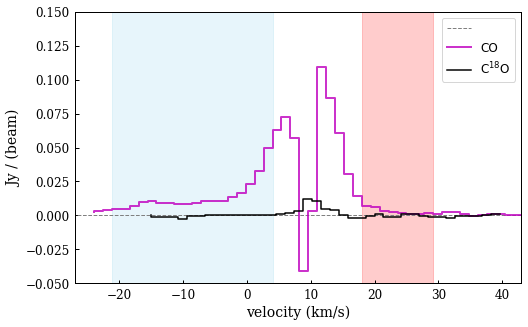

In [76]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,5))

spectrum_a1=a1.mean(axis=(1,2))
vsp_a1 = a1.spectral_axis
plt.hlines(y=0,xmin=-30,xmax=50,color='gray',linestyles='dashed',linewidths=1)

plt.step(vsp_a,spectrum_a,color='m',linewidth=2,alpha=0.8)

plt.step(vsp_a1,spectrum_a1,color='k',linewidth=1.5)

plt.xlabel('velocity (km/s)',fontdict={"family":'serif',"size":'14'})
plt.ylabel('Jy / (beam)',fontdict={"family":'serif',"size":'14'})

plt.legend(['','CO','C$^{18}$O'],fontsize=12)
# plt.vlines(x=18,ymin=-0.13,ymax=0.15,color='r',linestyles='dashed',linewidths=2,alpha=0.6)
# plt.vlines(x=30,ymin=-0.13,ymax=0.15,color='r',linestyles='dashed',linewidths=2,alpha=0.6)

# plt.vlines(x=4,ymin=-0.13,ymax=0.15,color='blue',linestyles='dashed',linewidths=2,alpha=0.6)
# plt.vlines(x=-22,ymin=-0.13,ymax=0.15,color='blue',linestyles='dashed',linewidths=2,alpha=0.6)

plt.xticks(fontsize=12,fontfamily="serif")
plt.yticks(fontsize=12,fontfamily="serif")

rect_b=mpatches.Rectangle((-21.2,-0.05),25.2,0.65,fill=True,color='skyblue',alpha=0.2)
plt.gca().add_patch(rect_b)
rect_r=mpatches.Rectangle((18,-0.05),11.2,0.65,fill=True,color='r',alpha=0.2)
plt.gca().add_patch(rect_r)


plt.xlim(-27,43)
plt.ylim(-0.05,0.15)
plt.savefig('spec_a.pdf')

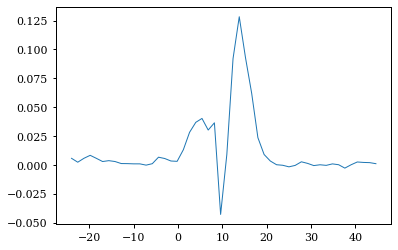

In [45]:
x=vsp_a.value
y=spectrum_a.value
plt.plot(x,y)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 76
    # data points      = 50
    # variables        = 3
    chi-square         = 0.00987887
    reduced chi-square = 2.1019e-04
    Akaike info crit   = -420.468987
    Bayesian info crit = -414.732918
[[Variables]]
    amp:  0.56852059 +/- 0.05263867 (9.26%) (init = 0.124)
    cen:  14.1987319 +/- 0.18933240 (1.33%) (init = 11)
    wid:  1.77102731 +/- 0.18933507 (10.69%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) = 0.577


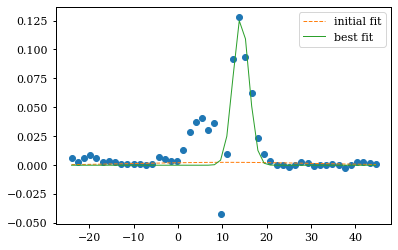

In [48]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model


def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)
result = gmodel.fit(y,x=x, amp=0.124, cen=11, wid=20)

print(result.fit_report())

plt.plot(x, y, 'o')
plt.plot(x, result.init_fit, '--', label='initial fit')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()

In [40]:
# a1=cube1[:,615:645,604:634]
a1=cube1[:,604:634,615:645]


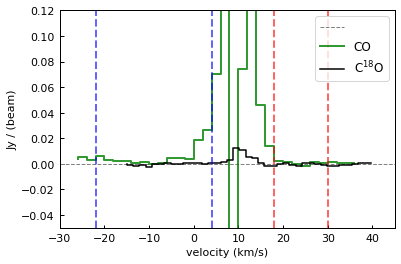

In [41]:
spectrum_a1=a1.mean(axis=(1,2))
vsp_a1 = a1.spectral_axis
plt.hlines(y=0,xmin=-30,xmax=50,color='gray',linestyles='dashed',linewidths=1)

plt.step(vsp_a,spectrum_a,color='g',linewidth=2,alpha=0.8)
plt.step(vsp_a1,spectrum_a1,color='k',linewidth=1.5)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy / (beam)')
# plt.title('Source A')
plt.legend(['','CO','C$^{18}$O'],fontsize=12)
plt.vlines(x=18,ymin=-0.05,ymax=0.15,color='r',linestyles='dashed',linewidths=2,alpha=0.6)
plt.vlines(x=30,ymin=-0.05,ymax=0.15,color='r',linestyles='dashed',linewidths=2,alpha=0.6)

plt.vlines(x=4,ymin=-0.05,ymax=0.15,color='blue',linestyles='dashed',linewidths=2,alpha=0.6)
plt.vlines(x=-22,ymin=-0.05,ymax=0.15,color='blue',linestyles='dashed',linewidths=2,alpha=0.6)

# plt.vlines(x=23,ymin=0,ymax=0.1,color='red',linewidths=3,alpha=0.6)
plt.xlim(-30,45)
plt.ylim(-0.05,0.12)
plt.savefig('spec_a.pdf')

In [88]:
# b=cube[90:140,597:607,662:672]
b=cube[90:140,662:672,597:607]

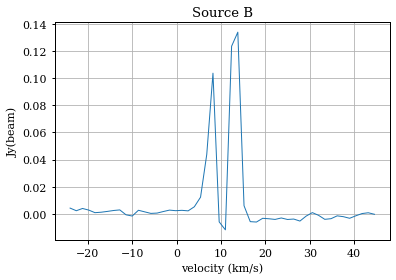

In [89]:
spectrum_b=b.mean(axis=(1,2))
vsp_b = b.spectral_axis
plt.plot(vsp_b,spectrum_b)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('Source B')
plt.grid()

In [92]:
b1=cube1[:,662:672,597:607]

NameError: name 'vsp_b' is not defined

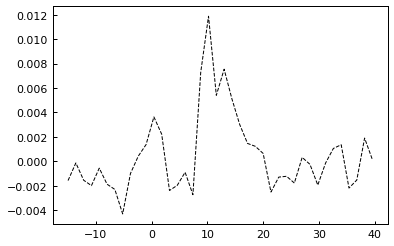

In [93]:
spectrum_b1=b1.mean(axis=(1,2))
vsp_b1 = b1.spectral_axis
plt.plot(vsp_b1,spectrum_b1,color='k',linestyle='dashed')
plt.plot(vsp_b,spectrum_b,color='green')
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy / (beam)')
plt.title('Source B')
plt.legend(['C18O','12CO'],fontsize=12)
plt.grid()
plt.savefig('spec_b.png')

In [92]:
# c=cube[90:140,626:636,622:632]
c=cube[90:140,622:632,626:636]


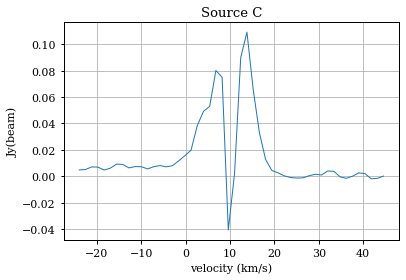

In [94]:
spectrum_c=c.mean(axis=(1,2))

vsp_c= c.spectral_axis
plt.plot(vsp_c,spectrum_c)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('Source C')
plt.grid()

In [64]:
c1=cube1[:,622:632,626:636]

NameError: name 'vsp_c' is not defined

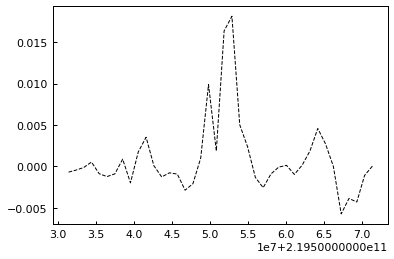

In [65]:
spectrum_c1=c1.mean(axis=(1,2))
vsp_c1 = c1.spectral_axis
plt.plot(vsp_c1,spectrum_c1,color='k',linestyle='dashed')
plt.plot(vsp_c,spectrum_c,color='green')
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy / (beam)')
plt.title('Source C')
plt.legend(['C18O','12CO'],fontsize=12)
plt.grid()
plt.savefig('spec_c.png')

In [97]:
# d=cube[90:140,621:631,641:651]
d=cube[90:140,641:651,621:631]

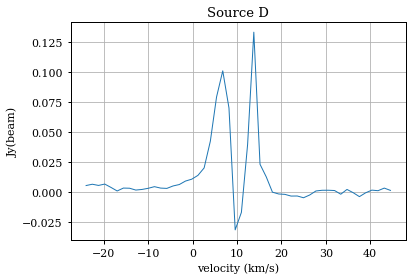

In [98]:
spectrum_d=d.mean(axis=(1,2))
vsp_d = d.spectral_axis
plt.plot(vsp_d,spectrum_d)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('Source D')
plt.grid()

In [51]:
d1=cube1[:,641:651,621:631]

NameError: name 'vsp_d' is not defined

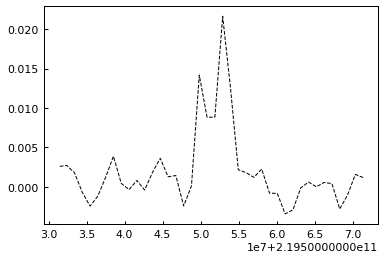

In [52]:
spectrum_d1=d1.mean(axis=(1,2))
vsp_d1 = d1.spectral_axis
plt.plot(vsp_d1,spectrum_d1,color='k',linestyle='dashed')
plt.plot(vsp_d,spectrum_d,color='green')
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy / (beam)')
plt.title('Source D')
plt.legend(['C18O','12CO'],fontsize=12)
plt.grid()
plt.savefig('spec_d.png')

In [ ]:
f=cube[80:140,652:662,652:662]

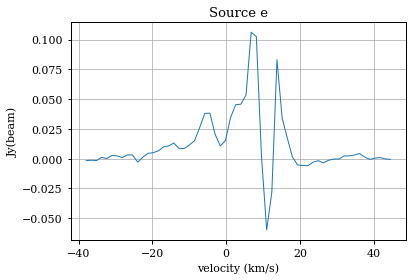

In [127]:
spectrum_f=f.mean(axis=(1,2))
vsp_f = f.spectral_axis
plt.plot(vsp_f,spectrum_f)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('Source e')
plt.grid()
plt.savefig('spec_e.png')

In [104]:
g=cube[90:140,572:580,492:500]

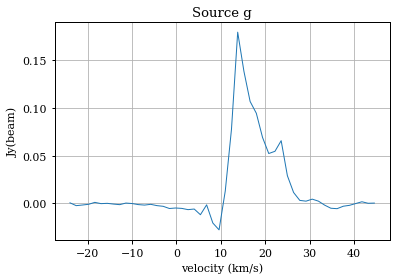

In [128]:
spectrum_g=g.mean(axis=(1,2))
vsp_g= g.spectral_axis
plt.plot(vsp_g,spectrum_g)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('Source g')
plt.grid()
plt.savefig('spec_g.png')

In [110]:
h=cube[90:140,442:447,612:618]

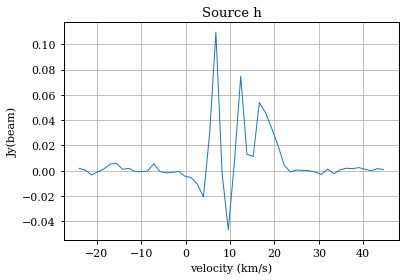

In [111]:
spectrum_h=h.mean(axis=(1,2))
vsp_h= h.spectral_axis
plt.plot(vsp_h,spectrum_h)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('Source h')
plt.grid()

In [67]:
from specutils.fitting import fit_generic_continuum

ModuleNotFoundError: No module named 'specutils'

In [50]:
hi_data = fits.open('G206.93-16.61E2_C180c.fits') [0] # Open the FITS file for reading
cube1 = sc.read(hi_data,hdu=0)

In [115]:
cube1 = cube1.with_spectral_unit(u.km / u.s, velocity_convention='radio')

In [116]:
cube.shape


(40, 1200, 1200)

In [44]:
cube[:,644:647,664:667]
print(cube)

SpectralCube with shape=(40, 1200, 1200) and unit=Jy / beam:
 n_x:   1200  type_x: RA---SIN  unit_x: deg    range:    85.395467 deg:   85.415466 deg
 n_y:   1200  type_y: DEC--SIN  unit_y: deg    range:    -2.298371 deg:   -2.278387 deg
 n_s:     40  type_s: VRAD      unit_s: km / s  range:      -15.000 km / s:      39.600 km / s


In [45]:
a=cube[:,644:647,664:667]

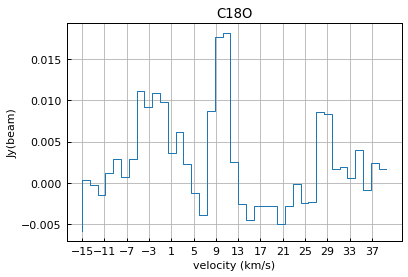

In [46]:

vsp = a.spectral_axis
spectrum=a.mean(axis=(1,2))
plt.step(vsp,spectrum)
plt.xlabel('velocity (km/s)')
plt.xticks(np.arange(-15,40,step=4))
plt.ylabel('Jy(beam)')
plt.title('C18O')
plt.grid()

In [8]:
b=cube[:,706:711,632:637]

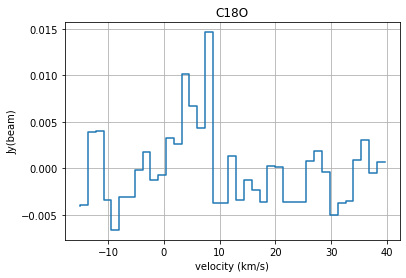

In [9]:
vsp = b.spectral_axis
spectrum=b.mean(axis=(1,2))
plt.step(vsp,spectrum)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('C18O')
plt.grid()

In [11]:
c=cube[:,660:665,665:670]

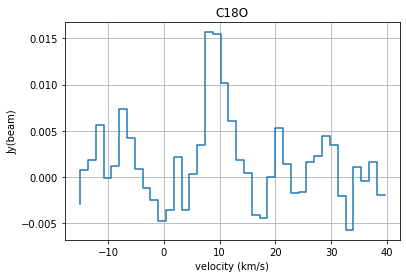

In [13]:
spectrum=c.mean(axis=(1,2))
plt.step(vsp,spectrum)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('C18O')
plt.grid()

In [14]:
d=cube[:,682:687,658:663]

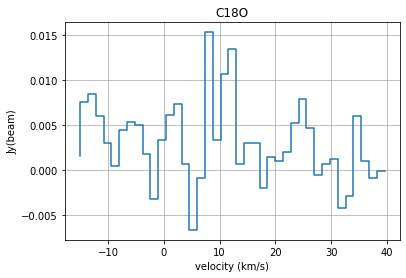

In [16]:
spectrum=d.mean(axis=(1,2))
plt.step(vsp,spectrum)
plt.xlabel('velocity (km/s)')
plt.ylabel('Jy(beam)')
plt.title('C18O')
plt.grid()

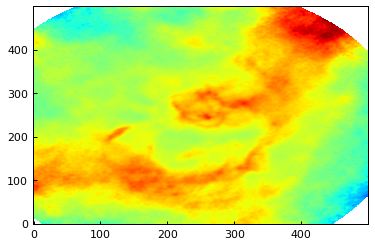

In [88]:
c = cube1.sum(axis=0)
plt.imshow(c.value,cmap='jet',origin='lower',aspect='auto',vmin=-3)

In [164]:
np.sum(a.value)

9035.043

In [165]:
np.sum(b.value)

9035.043

In [173]:
c.array

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [177]:
where_are_nan = np.isnan(c.array)
c.array[where_are_nan] = 0
np.sum(c.value)

9035.043